In [1]:
from reinforcement_training import *
from notebook_game_helper import *

Using Theano backend.


In [10]:
# lets train a DQN model!
training_game_size = 10
training_episodes = 10
steps = 100
# make the model
hiddens = [{"size":50,"activation":"relu"}]
#             {"size":20,"activation":"relu"},
#             {"size":20,"activation":"relu"}]
# note: AdaGrad and RMSProp are both available!
optimizer0 = sgd(lr = 0.0001)
optimizer1 = Adagrad(lr=0.01, epsilon=1e-08, decay=0.0)
optimizer2 = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model = baseline_model(optimizer2, hiddens)

# prepare the game for training model
training_game = NeuralNaviGame(training_game_size,
                                training_game_size,
                                model,
                                model_type = "reinforcement")
training_game.setup()

# train the model
log = train_model(game = training_game,
                model = model,
                episodes = training_episodes,
                steps = steps)

Episode 9, Wins: 1, Replay Loss: 483.57: 100%|██████████| 10/10 [00:14<00:00,  1.42s/it]


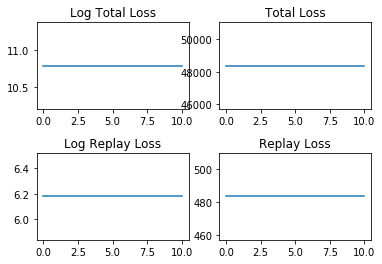

In [11]:
# plot learning info
f, axarr = pl.subplots(2, 2)
f.canvas.set_window_title("RL Loss, 100 eps w/ 50 steps, Look: 20")
x = np.linspace(0, len(log[0]), len(log[0]))
axarr[0, 0].plot(x, np.log(log[0]))
axarr[0, 0].set_title('Log Total Loss')
axarr[0, 1].plot(x, log[0])
axarr[0, 1].set_title('Total Loss')
axarr[1, 0].plot(x, np.log(log[1]))
axarr[1, 0].set_title('Log Replay Loss')
axarr[1, 1].plot(x, log[1])
axarr[1, 1].set_title('Replay Loss')
f.subplots_adjust(hspace=0.5)

pl.plot()
pl.savefig("rl_curve_x.png")
pl.show()

In [ ]:
val_game = NeuralNaviGame(8, 8, model = model0)

In [ ]:
val_game.setup()

In [ ]:
animate_game(val_game, n = 10)

In [ ]:
val_game.shift_goal()